# Big Mart Sales Prediction (CRISP-DM)

## Problem Defination : 
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

# Business Goal : 
Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

# Project Objective :
We will convert this problem into a machine learning regression problem . We will build a predictive model to predict the sales of each product at a particular outlet.

#### Data Mining Technique to be used : Regression 

# Data Set Information : 
Big Mart sales data for 1559 products across 10 stores in different cities in 2013 (Analytics Vidhya Hackathons )


### Attribute Information
* Item_Identifier:	Unique product ID
* Item_Weight:	Weight of product
* Item_Fat_Content:	Whether the product is low fat or not
* Item_Visibility:	The % of total display area of all products in a store allocated to the particular product
* Item_Type:	The category to which the product belongs
* Item_MRP:	Maximum Retail Price (list price) of the product
* Outlet_Identifier:	Unique store ID
* Outlet_Establishment_Year:	The year in which store was established
* Outlet_Size:	The size of the store in terms of ground area covered
* Outlet_Location_Type:	The type of city in which the store is located
* Outlet_Type:	Whether the outlet is just a grocery store or some sort of supermarket
* Item_Outlet_Sales:	Sales of the product in the particular store. This is the outcome variable to be predicted.

## Preliminary Data Analysis

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
train_df = pd.read_csv(r'D:\New Data Reposetary\Train.csv')

In [4]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train_df.shape

(8523, 12)

In [6]:
#unique item
train_df.Item_Identifier.nunique()

1559

In [7]:
#unique outlet 
train_df.Outlet_Identifier.nunique()

10

In [8]:
#count of outlet 
train_df.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [9]:
#outlet counts 
train_df.Outlet_Type.nunique()

4

In [10]:
#unique outlet 
train_df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Item_Weight contains 1463 null and Outlet_Size has 2410 null values

In [13]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


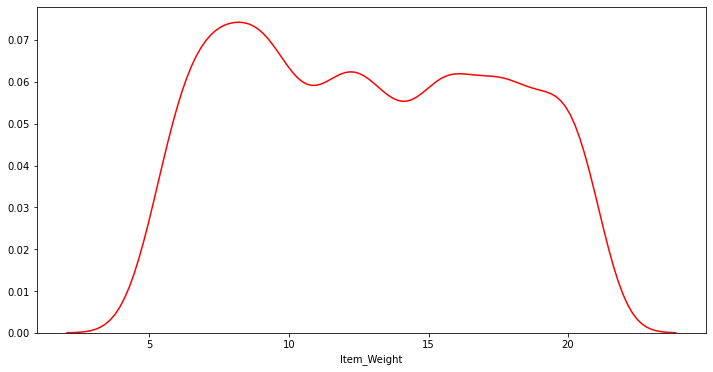

In [14]:
plt.figure(figsize=(12,6))
sns.distplot(train_df['Item_Weight'],color="r",hist=False)
plt.show()

In [22]:
#from scipy.stats import skew
train_df['Item_Weight'].skew(skipna=True)

0.0824262091221237

### As Item_Weight is a numerical variable and the distribution is not that much skewed we will replace the null values by mean 

In [23]:
train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean(),inplace=True)

### As Outlet_Size is a categorical variable we will replace the null values by mode

In [24]:
train_df['Outlet_Size'].mode()

0    Medium
dtype: object

In [25]:
train_df['Outlet_Size'] = train_df.Outlet_Size.fillna("Medium")

In [26]:
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

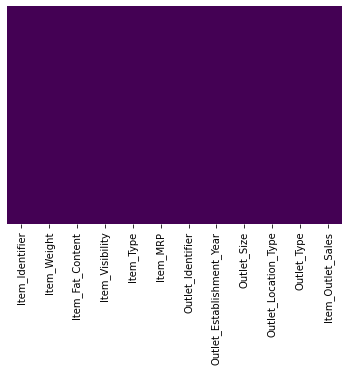

In [27]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Exploratory Data Analysis 

### Visualizing Categorical Variables

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

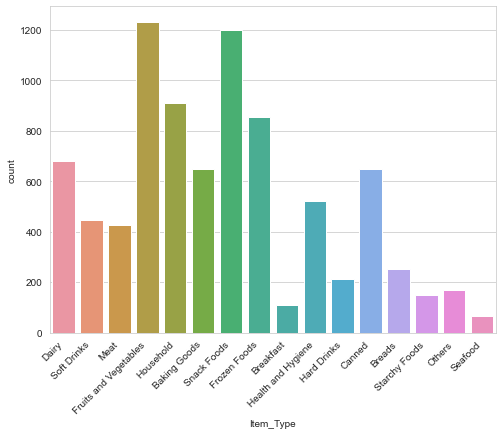

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.countplot(x='Item_Type',data=train_df)
plt.xticks(rotation=45, horizontalalignment='right')

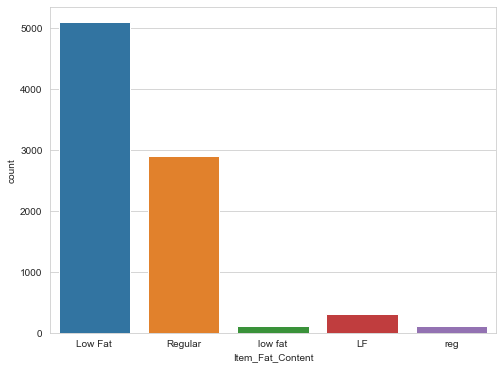

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.countplot(x='Item_Fat_Content',data=train_df)

In [22]:
# 'LF', 'low fat' are basically falls under the same category (Low Fat)
#so we will merger this category into one,
#similarly it can be done for ‘reg’ and ‘Regular’.

In [23]:
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})

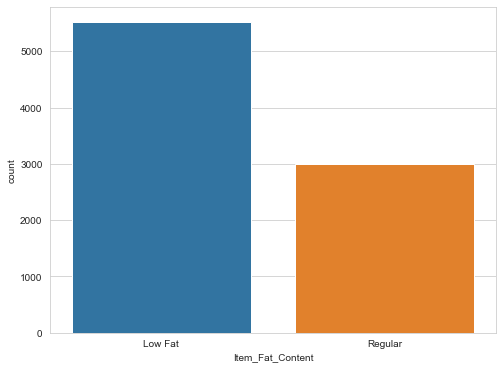

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.countplot(x='Item_Fat_Content',data=train_df)

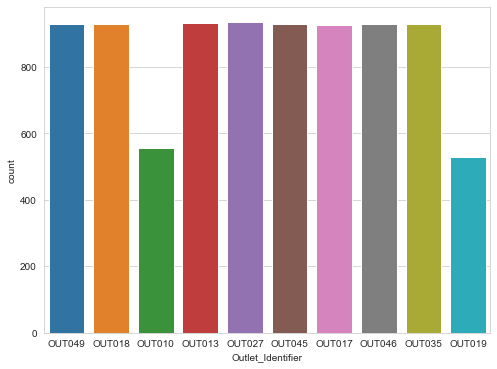

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.countplot(x='Outlet_Identifier',data=train_df)

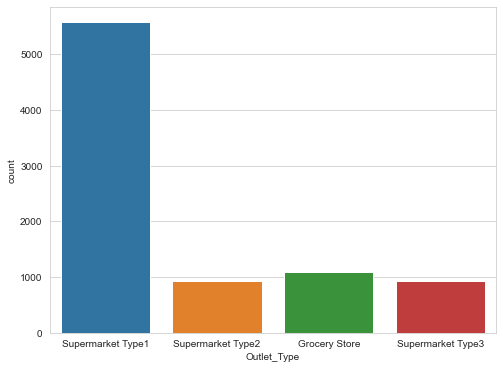

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.countplot(x='Outlet_Type',data=train_df)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

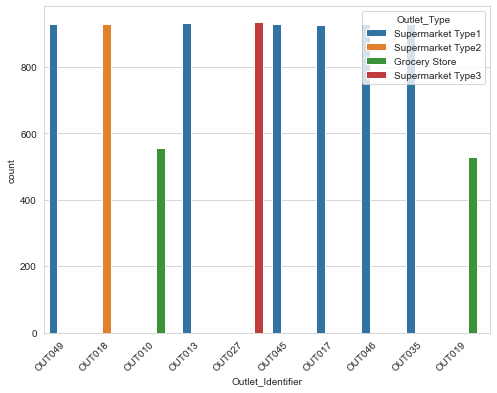

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.countplot(x='Outlet_Identifier',hue='Outlet_Type',data=train_df)
plt.xticks(rotation=45, horizontalalignment='right')

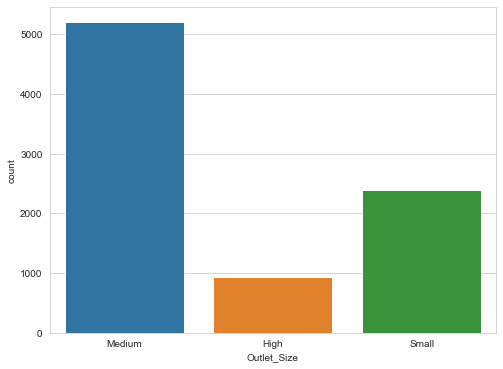

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.countplot(x='Outlet_Size',data=train_df)

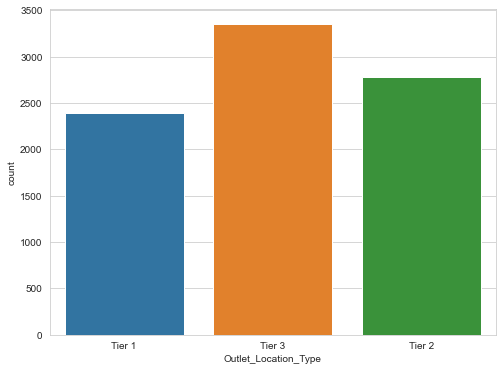

In [29]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.countplot(x='Outlet_Location_Type',data=train_df)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

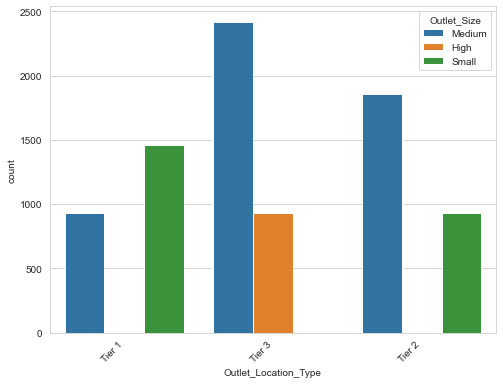

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.countplot(x='Outlet_Location_Type',hue='Outlet_Size',data=train_df)
plt.xticks(rotation=45, horizontalalignment='right')

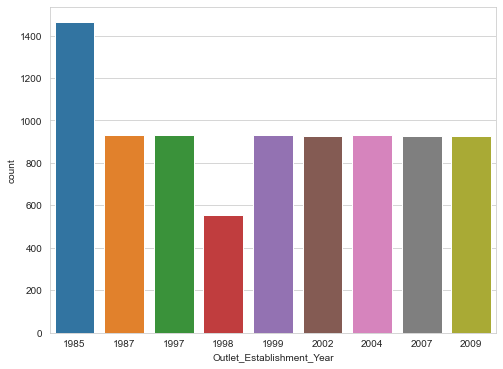

In [31]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.countplot(x='Outlet_Establishment_Year',data=train_df)

### Visualizing Numerical Variables

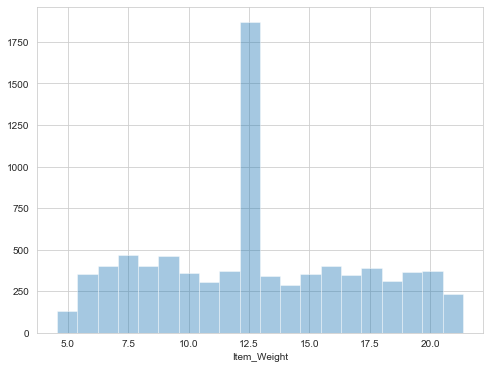

In [32]:
plt.figure(figsize=(8,6))
sns.distplot(train_df['Item_Weight'],kde=False, bins=20)

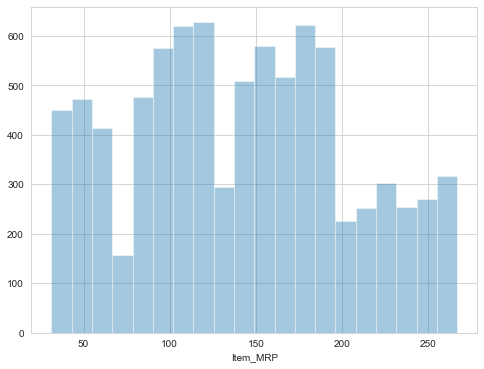

In [33]:
plt.figure(figsize=(8,6))
sns.distplot(train_df['Item_MRP'],kde=False, bins=20)

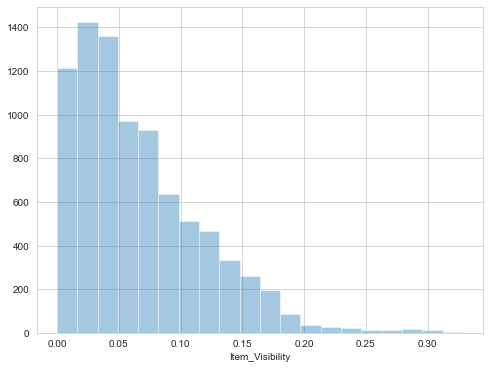

In [34]:
plt.figure(figsize=(8,6))
sns.distplot(train_df['Item_Visibility'],kde=False, bins=20)

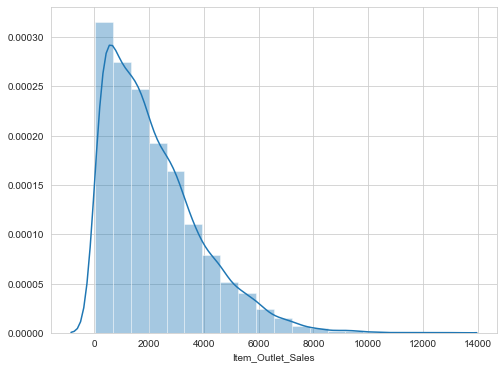

In [35]:
plt.figure(figsize=(8,6))
sns.distplot(train_df['Item_Outlet_Sales'], bins=20)

In [36]:
#Item_Outlet_Sales is right skewed with mean 2181.28 , median 1794.33

### Bivariate analysis

Text(0.5, 1.0, 'Outlet Type vs Items Sales')

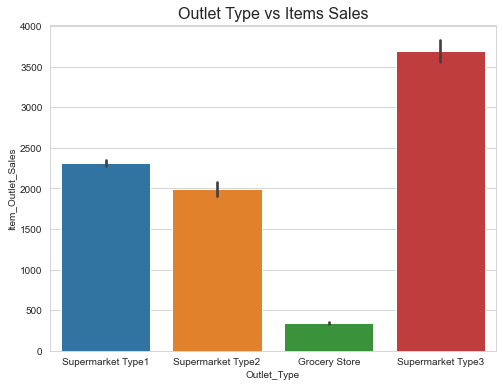

In [37]:
plt.figure(figsize=(8,6))
sns.barplot(x = "Outlet_Type",y="Item_Outlet_Sales", data=train_df)
plt.title('Outlet Type vs Items Sales',fontsize=16)

Text(0.5, 1.0, 'Outlet_Location_Type vs Items Sales')

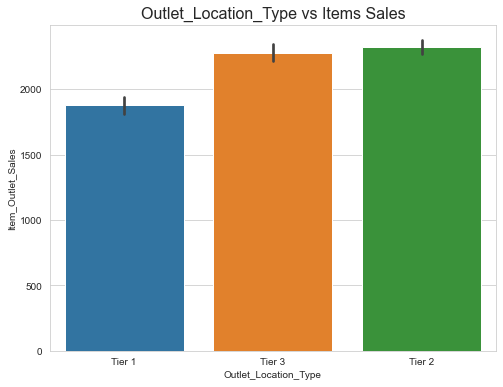

In [38]:
plt.figure(figsize=(8,6))
sns.barplot(x = "Outlet_Location_Type",y="Item_Outlet_Sales", data=train_df)
plt.title('Outlet_Location_Type vs Items Sales',fontsize=16)

Text(0.5, 1.0, 'Outlet_Size vs Items Sales')

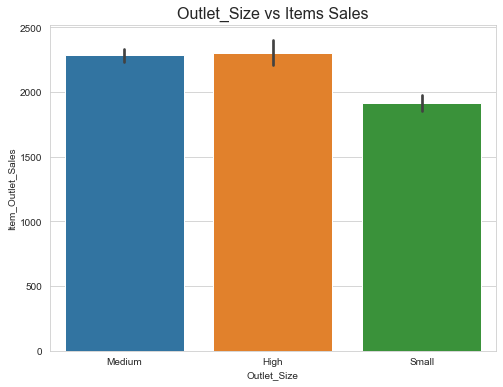

In [39]:
plt.figure(figsize=(8,6))
sns.barplot(x = "Outlet_Size",y="Item_Outlet_Sales", data=train_df)
plt.title('Outlet_Size vs Items Sales',fontsize=16)

Text(0.5, 1.0, 'Item_Fat_Content vs Items Sales')

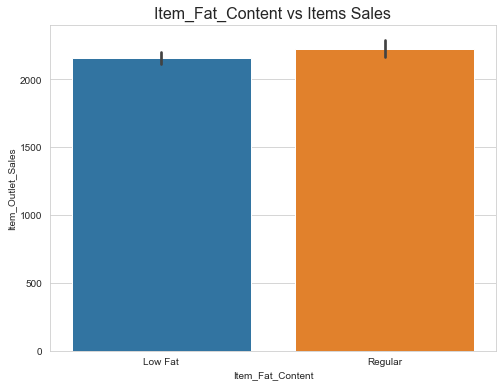

In [40]:
plt.figure(figsize=(8,6))
sns.barplot(x = "Item_Fat_Content",y="Item_Outlet_Sales", data=train_df)
plt.title('Item_Fat_Content vs Items Sales',fontsize=16)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

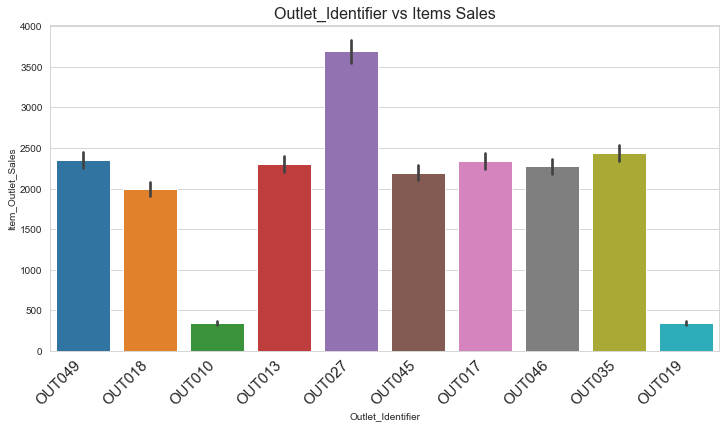

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(x = "Outlet_Identifier",y="Item_Outlet_Sales", data=train_df)
plt.title('Outlet_Identifier vs Items Sales',fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right',fontsize=15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

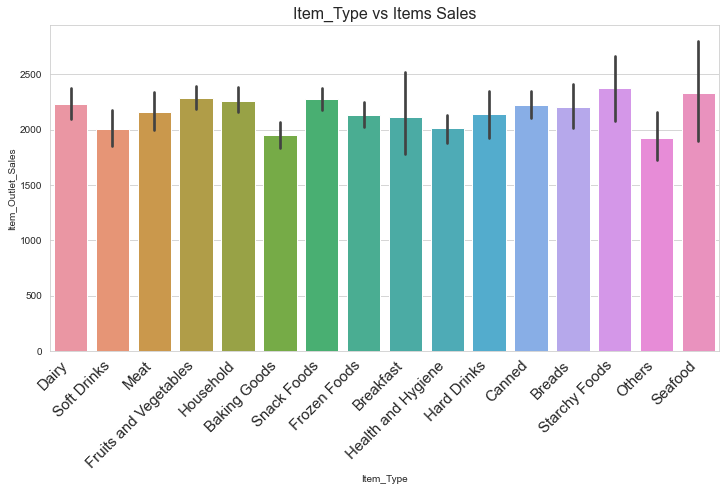

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(x = "Item_Type",y="Item_Outlet_Sales", data=train_df)
plt.title('Item_Type vs Items Sales',fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right',fontsize=15)

Text(0.5, 1.0, 'Outlet_Establishment_Year vs Items Sales')

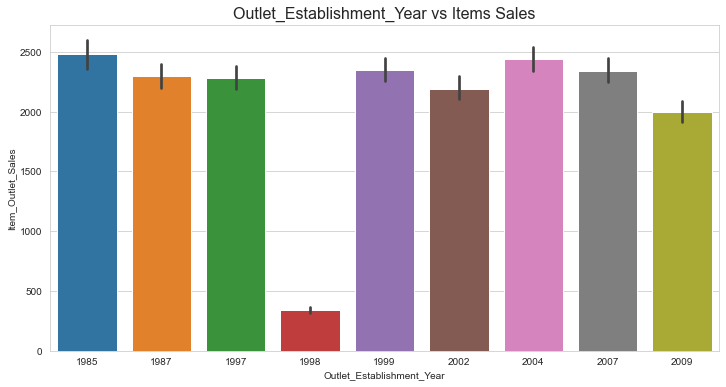

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(x = "Outlet_Establishment_Year",y="Item_Outlet_Sales", data=train_df)
plt.title('Outlet_Establishment_Year vs Items Sales',fontsize=16)

In [44]:
train_df.groupby('Outlet_Establishment_Year').agg({'Outlet_Identifier':'count'})

,Outlet_Identifier
Outlet_Establishment_Year,
1985,1463
1987,932
1997,930
1998,555
1999,930
2002,929
2004,930
2007,926
2009,928


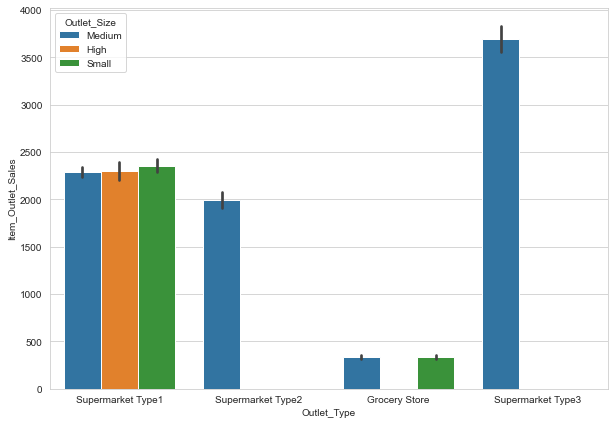

In [45]:
plt.figure(figsize=(10,7))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_df,hue='Outlet_Size')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

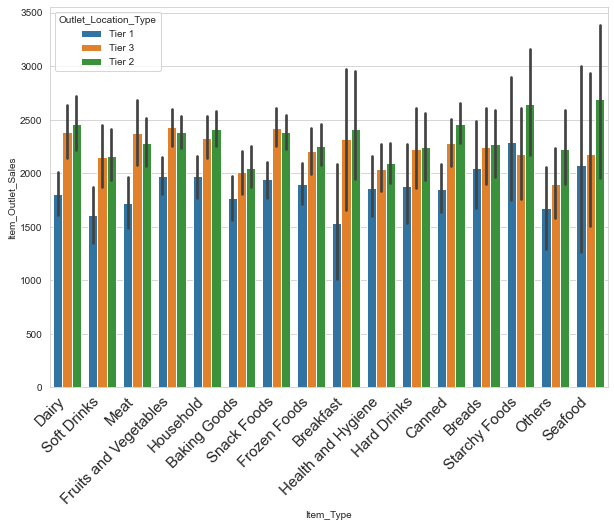

In [46]:
plt.figure(figsize=(10,7))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=train_df,hue='Outlet_Location_Type')
plt.xticks(rotation=45, horizontalalignment='right',fontsize=15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

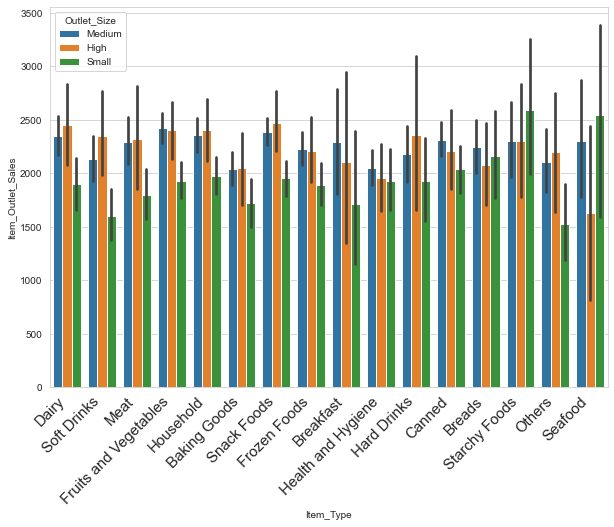

In [47]:
plt.figure(figsize=(10,7))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=train_df,hue='Outlet_Size')
plt.xticks(rotation=45, horizontalalignment='right',fontsize=15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

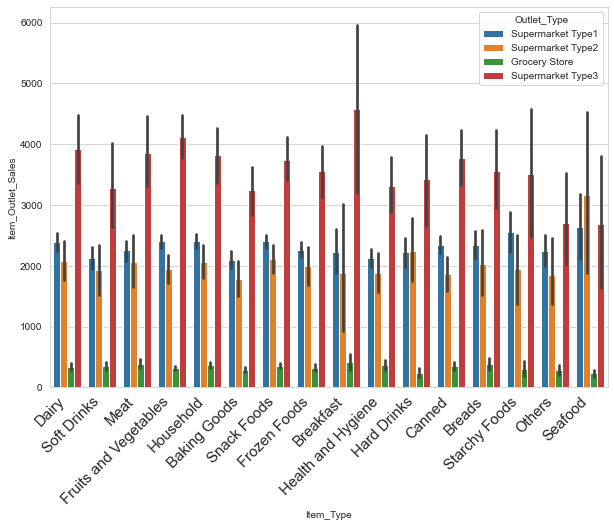

In [48]:
plt.figure(figsize=(10,7))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=train_df,hue='Outlet_Type')
plt.xticks(rotation=45, horizontalalignment='right',fontsize=15)

In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Text(0.5, 1.0, 'Outlet_Type vs total Sales')

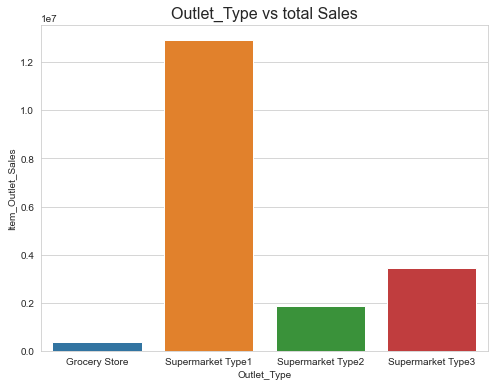

In [50]:
df1 = train_df.groupby('Outlet_Type').agg({'Item_Outlet_Sales':'sum'})
plt.figure(figsize=(8,6))
sns.barplot(x = df1.index, y = df1.Item_Outlet_Sales, data = df1)
plt.title('Outlet_Type vs total Sales',fontsize=16)

Text(0.5, 1.0, 'Outlet_Location_Type vs total Sales')

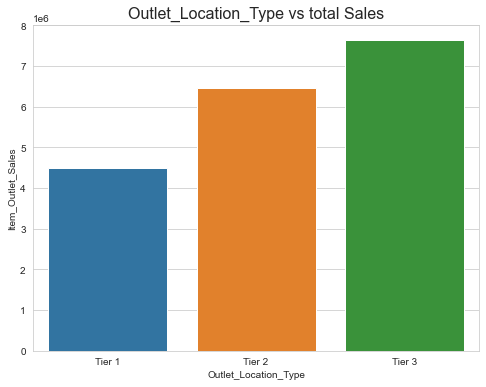

In [51]:
df2 = train_df.groupby('Outlet_Location_Type').agg({'Item_Outlet_Sales':'sum'})
plt.figure(figsize=(8,6))
sns.barplot(x = df2.index, y = df2.Item_Outlet_Sales, data = df2)
plt.title('Outlet_Location_Type vs total Sales',fontsize=16)

Text(0.5, 1.0, 'Outlet_Size vs total Sales')

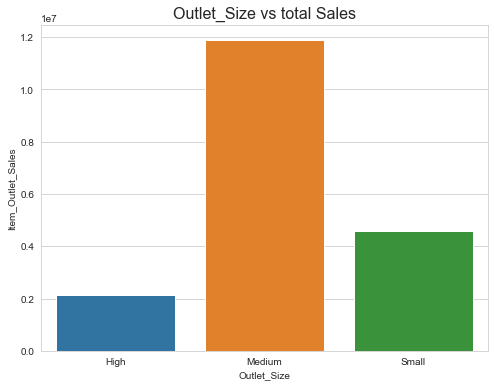

In [52]:
df3 = train_df.groupby('Outlet_Size').agg({'Item_Outlet_Sales':'sum'})
plt.figure(figsize=(8,6))
sns.barplot(x = df3.index, y = df3.Item_Outlet_Sales, data = df3)
plt.title('Outlet_Size vs total Sales',fontsize=16)

Text(0.5, 1.0, 'Outlet_Identifier vs total Sales')

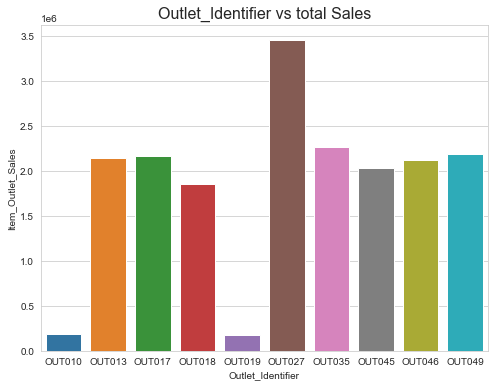

In [53]:
df4 = train_df.groupby('Outlet_Identifier').agg({'Item_Outlet_Sales':'sum'})
plt.figure(figsize=(8,6))
sns.barplot(x = df4.index, y = df4.Item_Outlet_Sales, data = df4)
plt.title('Outlet_Identifier vs total Sales',fontsize=16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

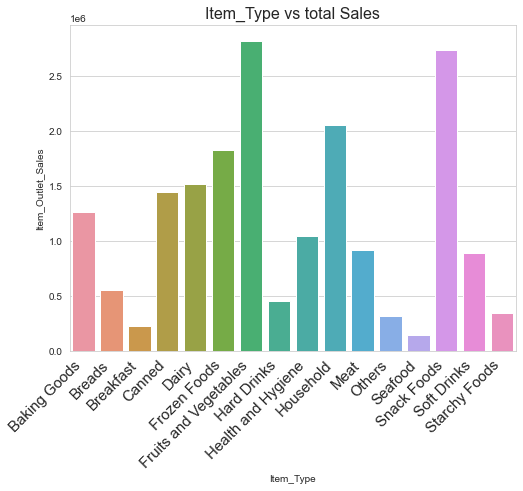

In [54]:
df5 = train_df.groupby('Item_Type').agg({'Item_Outlet_Sales':'sum'})
plt.figure(figsize=(8,6))
sns.barplot(x = df5.index, y = df5.Item_Outlet_Sales, data = df5)
plt.title('Item_Type vs total Sales',fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right',fontsize=15)

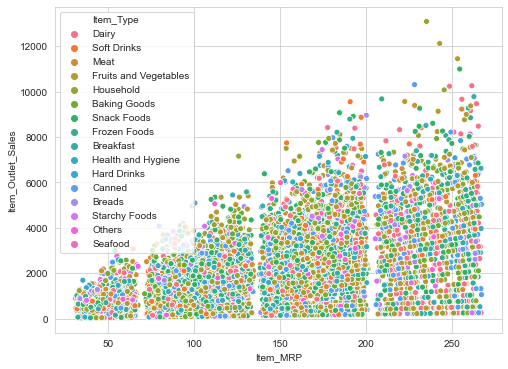

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = "Item_MRP",y="Item_Outlet_Sales",hue='Item_Type', data = train_df)

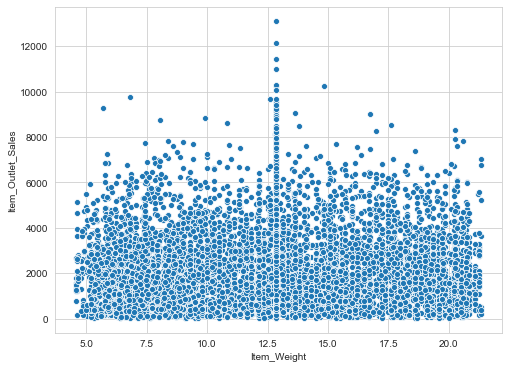

In [56]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = "Item_Weight",y="Item_Outlet_Sales", data = train_df)

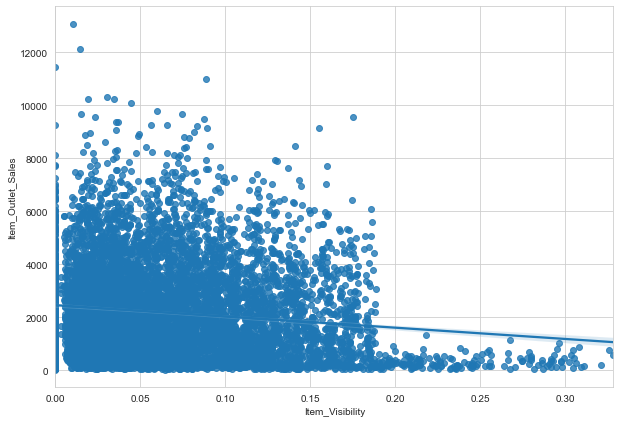

In [57]:
plt.figure(figsize=(10,7))
sns.regplot(x = "Item_Visibility",y="Item_Outlet_Sales", data = train_df)

In [58]:
# We can not detect any perticular pattern here ,and there are few points at
# '0' visibility which does not make any sense ,we have to deal with this later

<Figure size 576x432 with 0 Axes>

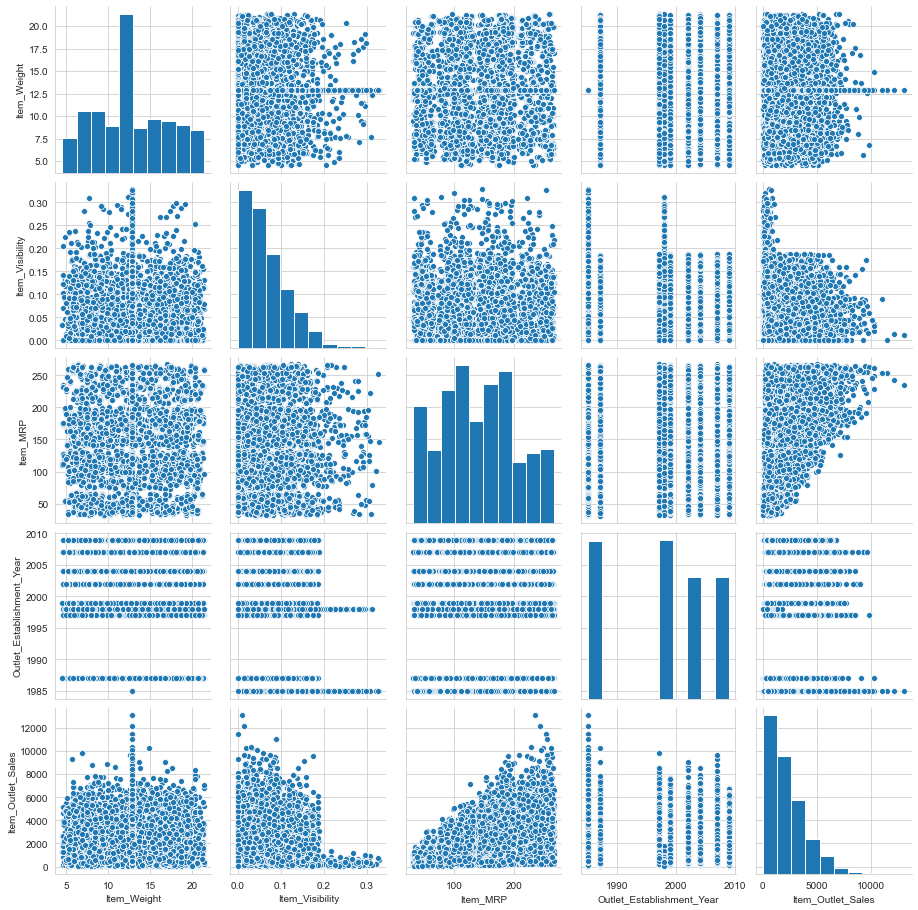

In [59]:
plt.figure(figsize=(8,6))
sns.pairplot(train_df)

#### There is no significat correlation observed except Item_MRP vs Item_Outlet_Sales, the MRP of items increases the sales is also increasing.

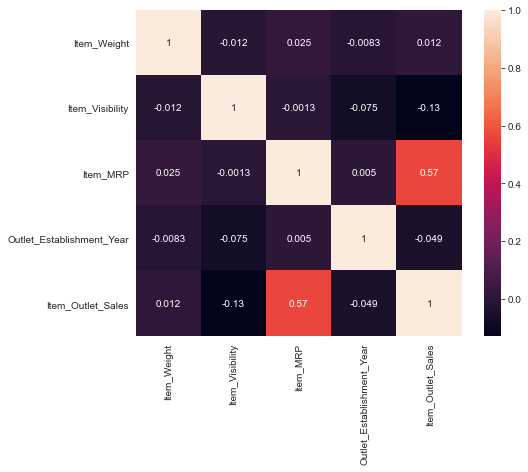

In [61]:
corrmat = train_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corrmat, annot=True, square=True)

#### no significant correlation observed between variables , excpet Item_MRP vs Item_Outlet_Sales

## Data Pre-Processing

In [63]:
train_df.shape

(8523, 12)

In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Modifying Item_Visibility ,We noticed that the minimum value here is 0, which makes no practical sense.so we will replace the 0 value with mean of the Item_Visibility

In [66]:
mean_Item_Visibility = train_df['Item_Visibility'].mean()

In [67]:
mean_Item_Visibility

0.06613202877895127

In [68]:
train_df['Item_Visibility']=train_df['Item_Visibility'].mask(train_df['Item_Visibility'] == 0,mean_Item_Visibility)

In [69]:
train_df['Item_Visibility'].describe()

count    8523.000000
mean        0.070213
std         0.048742
min         0.003575
25%         0.033085
50%         0.062517
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

#### dealing with categorical variables 

In [71]:
train_df['Item_Identifier'].value_counts

<bound method IndexOpsMixin.value_counts of 0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object>

#### all enrties have diffrent Item_Identifier we will try to group them otherwise  our model will perform poorly 

In [73]:
train_df.groupby('Item_Type')['Item_Identifier'].unique()

Item_Type
Baking Goods             [FDP36, FDW12, FDC37, FDL12, FDN48, FDR12, FDA...
Breads                   [FDO23, FDV11, FDW11, FDR47, FDZ35, FDV59, FDP...
Breakfast                [FDP49, FDQ49, FDN13, FDN01, FDM25, FDO01, FDM...
Canned                   [FDC14, FDC02, FDL50, FDV49, FDR13, FDI26, FDG...
Dairy                    [FDA15, FDA03, FDU02, FDE51, FDV38, FDM39, FDS...
Frozen Foods             [FDH17, FDU28, FDR28, FDM40, FDY40, FDC29, FDL...
Fruits and Vegetables    [FDX07, FDY07, FDX32, FDF32, FDV20, FDA43, FDM...
Hard Drinks              [DRI11, DRJ59, DRK35, DRG23, DRM47, DRP47, DRQ...
Health and Hygiene       [NCB42, NCS17, NCX29, NCP05, NCL17, NCI17, NCR...
Household                [NCD19, NCB30, NCD06, NCP18, NCX54, NCZ18, NCL...
Meat                     [FDN15, FDK43, FDV27, FDH19, FDN27, FDW39, FDW...
Others                   [NCN07, NCO55, NCM43, NCN55, NCO07, NCM31, NCK...
Seafood                  [FDG33, FDH21, FDG21, FDJ57, FDJ45, FDI57, FDK...
Snack Foods    

In [74]:
# so for one perticuler item there are multiple identifier,we have to try to 
#categorise the item codes 
# if we look at the item identifier 'FD' stands for Food 'DR' stands for Drinks 
# and 'NC' stands for Goods so we will combine Item_Identifier into three 
#category 

In [75]:
train_df['Item_Identifier'] = train_df['Item_Identifier'].apply(lambda x: x[0:2])

In [76]:
train_df['Item_Category'] = train_df['Item_Identifier'].replace({'FD':'Food','NC':'Goods', 'DR':'Drinks'})

In [77]:
train_df['Item_Category'].value_counts()

Food      6125
Goods     1599
Drinks     799
Name: Item_Category, dtype: int64

In [78]:
train_df = train_df.drop('Item_Identifier',axis=1)

In [79]:
train_df.shape

(8523, 12)

In [81]:
#Item_Type_frequency = train_df.groupby('Item_Type').size()/len(train_df)

In [82]:
#Item_Type_frequency

In [83]:
#train_df['Item_Type_frequency'] = train_df['Item_Type'].map(Item_Type_frequency)

In [84]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Goods


In [85]:
train_df.shape

(8523, 12)

In [86]:
# we will drop the year column 

In [87]:
train_df = train_df.drop('Outlet_Establishment_Year',axis=1)

In [88]:
train_df.shape

(8523, 11)

In [99]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Identifier     8523 non-null   object 
 6   Outlet_Size           8523 non-null   object 
 7   Outlet_Location_Type  8523 non-null   object 
 8   Outlet_Type           8523 non-null   object 
 9   Item_Outlet_Sales     8523 non-null   float64
 10  Item_Category         8523 non-null   object 
dtypes: float64(4), object(7)
memory usage: 732.6+ KB


In [101]:
df_test = train_df['Item_Outlet_Sales']

In [125]:
df_test.shape

(8523,)

In [102]:
df_train = train_df.drop('Item_Outlet_Sales',axis=1)

In [103]:
df_train.shape

(8523, 10)

In [110]:
df_train_cat=df_train.select_dtypes(include=['object'])

In [111]:
df_train_cat.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Category
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,Food
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,Drinks
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,Food
3,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,Food
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,Goods


In [113]:
df_train_cat.shape

(8523, 7)

In [118]:
df_train_cat_dummy=pd.get_dummies(df_train_cat,drop_first=True)
df_train_cat_dummy.shape

(8523, 34)

In [116]:
df_train_num=df_train.select_dtypes(exclude=['object'])

In [117]:
df_train_num.head()

,Item_Weight,Item_Visibility,Item_MRP
0,9.30,0.016047,249.8092
1,5.92,0.019278,48.2692
2,17.50,0.016760,141.6180
3,19.20,0.066132,182.0950
4,8.93,0.066132,53.8614


In [119]:
df_train_num.shape

(8523, 3)

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train_num_scaled=pd.DataFrame(scaler.fit_transform(df_train_num),columns=df_train_num.columns)

In [121]:
df_train_num_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP
0,-0.841872,-1.111358,1.747454
1,-1.641706,-1.045067,-1.489023
2,1.098554,-1.096733,0.010040
3,1.500838,-0.083740,0.660050
4,-0.929428,-0.083740,-1.399220


In [122]:
df_train_final= pd.concat([df_train_num_scaled, df_train_cat_dummy], axis=1,sort=False)
df_train_final

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Food,Item_Category_Goods
0,-0.841872,-1.111358,1.747454,0,0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,1,0
1,-1.641706,-1.045067,-1.489023,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
2,1.098554,-1.096733,0.010040,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,1.500838,-0.083740,0.660050,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4,-0.929428,-0.083740,-1.399220,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.418084,-0.275551,1.180783,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
8519,-1.059578,-0.476643,-0.527301,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
8520,-0.534243,-0.718672,-0.897208,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
8521,-1.336444,1.538968,-0.607977,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0


#### Train-Test Split 

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error
import sklearn.metrics

In [124]:
X_train,X_test,y_train,y_test=train_test_split(df_train_final,df_test,test_size=0.2,random_state=101)

In [128]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(6818, 37)
(1705, 37)
(6818,)
(1705,)


# Model and Evaluation 

### Model Used 
* Linear Regression 
* Decision Tree Regression 
* Random Forest Regression 

### Evaluation Metrics
* MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
* MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
* RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
* R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

## Linear Regression 

In [135]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [136]:
r2 = sklearn.metrics.r2_score(y_test, y_pred_lr)
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred_lr)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
print("R2 score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R2 score: 0.5578473941894679
MAE: 825.1626555087092
MSE: 1205027.121440538
RMSE: 1097.7372734131504


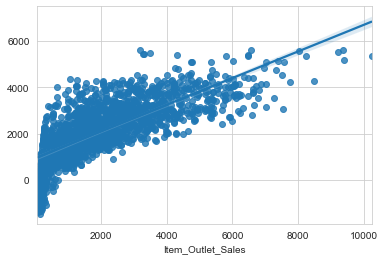

In [137]:
sns.regplot(y_test, y_pred_lr)

## Decision Tree Regression 

In [131]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [132]:
r2 = sklearn.metrics.r2_score(y_test, y_pred_dt)
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred_dt)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
print("R2 score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R2 score: 0.14406441608434806
MAE: 1063.1408490322578
MSE: 2332736.659854455
RMSE: 1527.3299119229137


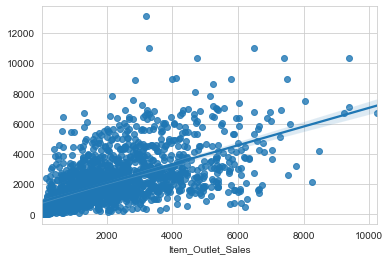

In [138]:
sns.regplot(y_test, y_pred_dt)

## Random Forest Regression 

In [133]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
dt.fit(X_train, y_train)
y_pred_rf = dt.predict(X_test)

In [134]:
r2 = sklearn.metrics.r2_score(y_test, y_pred_rf)
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred_rf)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
print("R2 score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R2 score: 0.13910855840918124
MAE: 1067.502327155425
MSE: 2346243.1796173044
RMSE: 1531.7451418618257


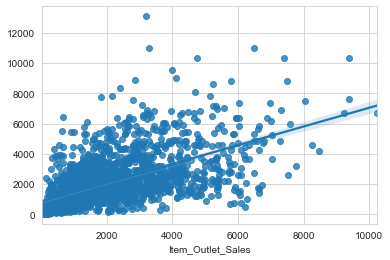

In [139]:
sns.regplot(y_test, y_pred_rf)

## Observations: 
The RMSE and R squared value is comparatively better for Linear regression so we will consider this model in this case, Later on we will try to hyper tune the models and check for the optimum results